<h1 align="center">ToxDataCommons to mwTab</h1> 

This Jupyter notebook demonstrates how to export data from [ToxDataCommons](fairtox.com) in order to deposit mass spectrometry data to the [Metabolomics Workbench](metabolomicsworkbench.org). 

__Created by: Rance Nault, Michigan State University; Shuangyu Zhao, Michigan State University__

-------

## Load packages
Import the mwtab python package. See https://github.com/MoseleyBioinformaticsLab/mwtab for installation instructions and documentation

In [41]:
import os
import sys
import csv
import gen3
import json
import mwtab
import warnings

import matplotlib.pyplot as plt

from io import StringIO
from datetime import datetime
from collections import OrderedDict
from expansion import Gen3Expansion # https://raw.githubusercontent.com/cgmeyer/gen3sdk-python/master/expansion/expansion.py

from gen3.auth import Gen3Auth
from gen3.index import Gen3Index
from gen3.query import Gen3Query
from gen3.submission import Gen3Submission 

from TDCexpansion import Gen3process  # https://raw.githubusercontent.com/naultran/toxdatacommons/main/script/TDCexpansion.py

current_date = datetime.now().date()
formatted_date = current_date.strftime('%Y-%m-%d')

warnings.filterwarnings("ignore", category=UserWarning)

In [42]:
# Initiate instances of the Gen3 SDK Classes using credentials file for authentication.
# Change the directory path in "cred" to reflect the location of your credentials file.
api = "https://fairtox.com"
cred = "/Users/apple/Desktop/CEC/credentials.json"
auth = Gen3Auth(api, refresh_file=cred) 
sub = Gen3Submission(api, auth) 
process = Gen3process( sub )
query = Gen3Query(auth) 
exp = Gen3Expansion(api,auth,sub) 
exp.get_project_ids()

Getting all project_ids you have access to in the data commons.
['MyFirstProgram-MyFirstProject']


['MyFirstProgram-MyFirstProject']

<h1 align="center">Obtain project data from <i>ToxDataCommons</i></h1> 

<h2 align="center">Study details</h2> 

In [43]:
study_df = process.build_study('MyFirstProgram', 'MyFirstProject', studies_to_match = ['Prj171'])
study_df

,studies.type,studies.project_id,studies.submitter_id,experimental_setting,organism,studies.provenance,study_description,study_design,study_title,study_type,...,location,middle_name,contacts.provenance,publications.type,publications.project_id,publications.submitter_id,DOI,PMC_id,PMID,publications.provenance
0,study,MyFirstProgram-MyFirstProject,Prj171,in vivo,Mus musculus,NaN,Male mice were treated with TCDD every 4 days ...,dose response design,Prj171_Mm_TCDD_RDDR-28D_Male,Toxicogenomics,...,48824:East Lansing,NaN,NaN,publication,MyFirstProgram-MyFirstProject,Prj171:9418907,10.1016/j.jbc.2022.102301,9418907,35931118,NaN


<h2 align="center">Subject details</h2>

In [12]:
subject_df = process.build_subject('MyFirstProgram', 'MyFirstProject', studies_to_match = ['Prj171'], subjects_to_match = [])
subject_df.columns

Index(['subjects.type', 'subjects.project_id', 'subjects.submitter_id',
       'euthanasia_date', 'euthanasia_method', 'euthanasia_zt',
       'experiment_start_date', 'experiment_start_zt', 'subjects.provenance',
       'sex', 'start_date', 'start_date_age', 'strain', 'strain_source',
       'studies.submitter_id', 'treatments.type', 'treatments.project_id',
       'treatments.submitter_id', 'treatment_protocol', 'addition_volume',
       'administration_volume_ml', 'concentration_unit', 'treatments.date',
       'dose_amount', 'dose_amount_unit', 'final_concentration',
       'treatments.provenance', 'route', 'stock_concentration',
       'test_article_administration_duration',
       'test_article_administration_zt', 'test_article_dtxsid',
       'test_article_name', 'vehicle_dtxsid', 'vehicle_name',
       'cell_subjects.submitter_id', 'housings.type', 'housings.project_id',
       'housings.submitter_id', 'bedding_type', 'cageID', 'cage_type',
       'housing_change_date', 'housin

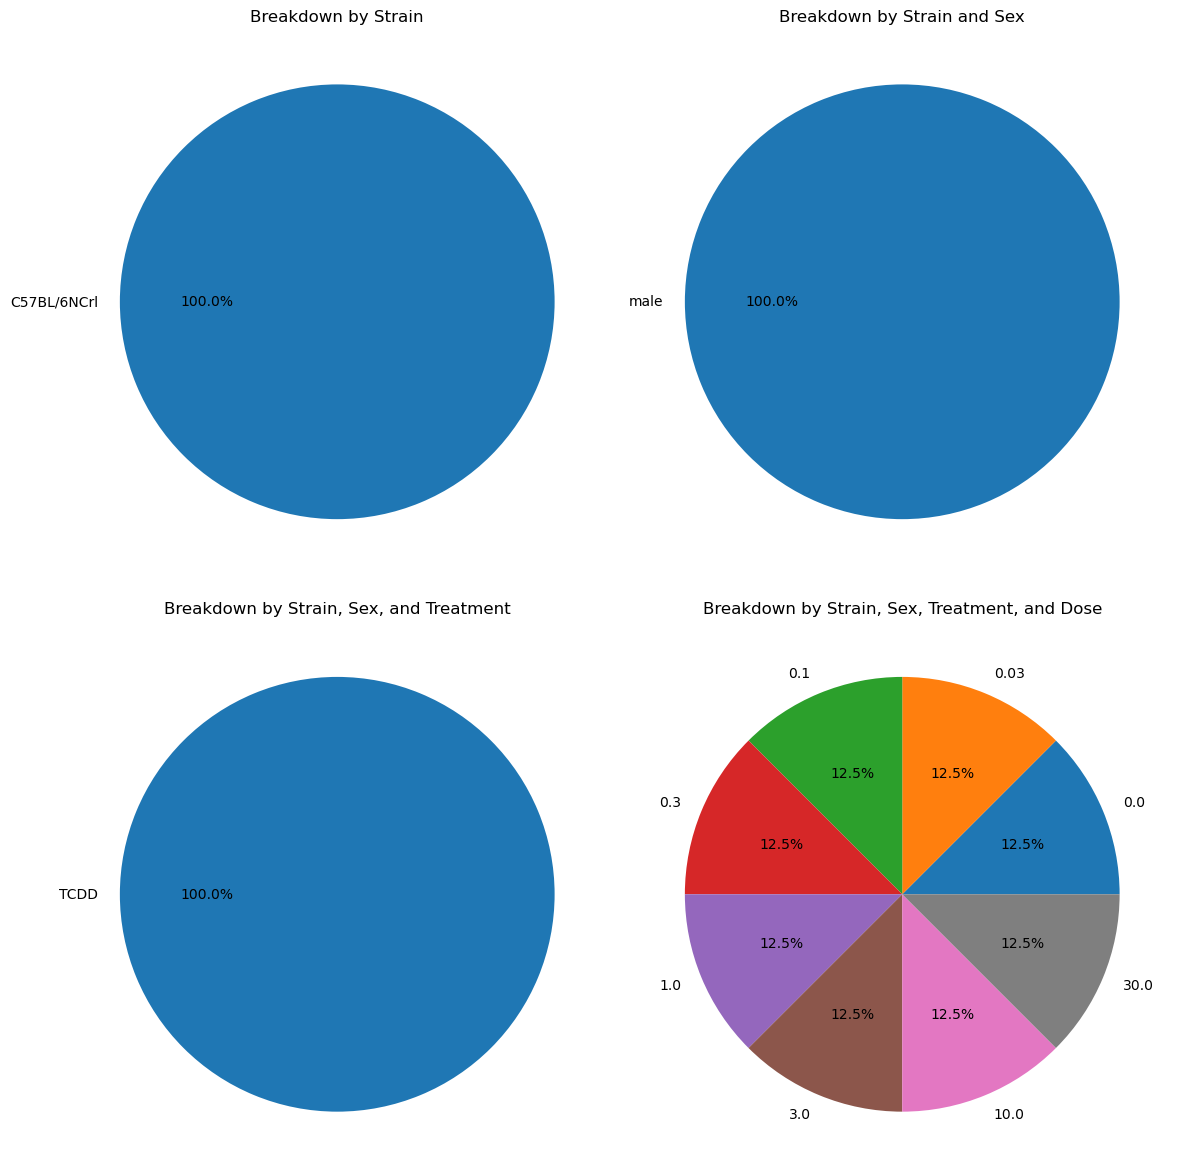

In [13]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Breakdown 1: Strain
strain_counts = subject_df['strain'].value_counts()
axes[0, 0].pie(strain_counts, labels=strain_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Breakdown by Strain')

# Breakdown 2: Strain + Sex
strain_sex_counts = subject_df.groupby(['strain', 'sex']).size().unstack()
axes[0, 1].pie(strain_sex_counts.values.flatten(), labels=strain_sex_counts.columns, autopct='%1.1f%%')
axes[0, 1].set_title('Breakdown by Strain and Sex')

# Breakdown 3: Strain + Sex + Treatment
strain_sex_treatment_counts = subject_df.groupby(['strain', 'sex', 'test_article_name']).size().unstack()
axes[1, 0].pie(strain_sex_treatment_counts.values.flatten(), labels=strain_sex_treatment_counts.columns, autopct='%1.1f%%')
axes[1, 0].set_title('Breakdown by Strain, Sex, and Treatment')

# Breakdown 4: Strain + Sex + Treatment + Dose
strain_sex_treatment_dose_counts = subject_df.groupby(['strain', 'sex', 'test_article_name', 'dose_amount']).size().unstack()
axes[1, 1].pie(strain_sex_treatment_dose_counts.values.flatten(), labels=strain_sex_treatment_dose_counts.columns, autopct='%1.1f%%')
axes[1, 1].set_title('Breakdown by Strain, Sex, Treatment, and Dose')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<h2 align="center">Sample details</h2>

In [14]:
#subject_df['submitter_id_x'].unique()

sample_df = process.build_sample('MyFirstProgram', 'MyFirstProject', subjects_to_match = [])
display(sample_df.columns)
display(sample_df.head())

Index(['samples.type', 'samples.project_id', 'samples.submitter_id',
       'biospecimen_anatomic_site', 'collection_protocol', 'date',
       'method_of_sample_procurement', 'preservation_method',
       'samples.provenance', 'storage_vessel', 'volume', 'weight',
       'cell_subjects.submitter_id', 'subjects.submitter_id', 'aliquots.type',
       'aliquots.project_id', 'aliquots.submitter_id', 'analyte_protocol',
       'analyte_type', 'derivitization', 'extract_preservation_method',
       'aliquots.provenance', 'mass_spec_assays.project_id',
       'mass_spec_assays.submitter_id', 'calibration_standard', 'carrier_gas',
       'chromatography_column', 'chromatography_instrument',
       'chromatography_method_filename', 'chromatography_protocol',
       'chromatography_type', 'elution_program', 'flow_rate', 'ion_mode',
       'ms_method_filename', 'ms_protocol', 'ms_type',
       'oven_temperature_program', 'mass_spec_assays.provenance',
       'sample_dilution', 'solventA', 'solven

,samples.type,samples.project_id,samples.submitter_id,biospecimen_anatomic_site,collection_protocol,date,method_of_sample_procurement,preservation_method,samples.provenance,storage_vessel,...,file_name,file_size,file_source_repository,md5sum,object_id,ms_raw_datas.provenance,repository_accession_id,repository_download_ftp,state_comment,core_metadata_collections.submitter_id
0,sample,MyFirstProgram-MyFirstProject,Prj171:L83,Liver,Tissue was carefully excised and immediately f...,2022-04-11,NaN,Snap Frozen,"DataHarmonizer v1.4.10, Sample v4.3.1",2 mL screwcap tube,...,TQSm_042122_016.mzML,3489881,NaN,c27a557b720aebbb86834c9c9b3acfaf,PREFIX/c8b48931-9442-4d7b-8cde-9e5f37f88d7c,NaN,NaN,NaN,NaN,NaN
1,sample,MyFirstProgram-MyFirstProject,Prj171:L113,Liver,Tissue was carefully excised and immediately f...,2022-04-11,NaN,Snap Frozen,"DataHarmonizer v1.4.10, Sample v4.3.1",2 mL screwcap tube,...,TQSm_042122_028.mzML,3490000,NaN,2d8027f104da3bff7d40588aaff4d28e,PREFIX/f990eb1d-09b5-452f-be74-2602838dc9b2,NaN,NaN,NaN,NaN,NaN
2,sample,MyFirstProgram-MyFirstProject,Prj171:L85,Liver,Tissue was carefully excised and immediately f...,2022-04-11,NaN,Snap Frozen,"DataHarmonizer v1.4.10, Sample v4.3.1",2 mL screwcap tube,...,TQSm_042122_020.mzML,3490136,NaN,28b0dce0ec11fdc5756cdf6971fa7f8b,PREFIX/28ea8716-f52e-40e9-9c48-3376a41c2dae,NaN,NaN,NaN,NaN,NaN
3,sample,MyFirstProgram-MyFirstProject,Prj171:L112,Liver,Tissue was carefully excised and immediately f...,2022-04-11,NaN,Snap Frozen,"DataHarmonizer v1.4.10, Sample v4.3.1",2 mL screwcap tube,...,TQSm_042122_027.mzML,3490247,NaN,3ce2e6599ff61d9e63bd5fc1d29d6f01,PREFIX/30f918bc-7d85-4a1c-8aa3-78f5464ef47e,NaN,NaN,NaN,NaN,NaN
4,sample,MyFirstProgram-MyFirstProject,Prj171:L143,Liver,Tissue was carefully excised and immediately f...,2022-04-11,NaN,Snap Frozen,"DataHarmonizer v1.4.10, Sample v4.3.1",2 mL screwcap tube,...,TQSm_042122_039.mzML,3490363,NaN,a8bb43fdb40319f4b050f10137a57695,PREFIX/a722c253-dcd7-4c0a-8d21-1ad14f292d82,NaN,NaN,NaN,NaN,NaN


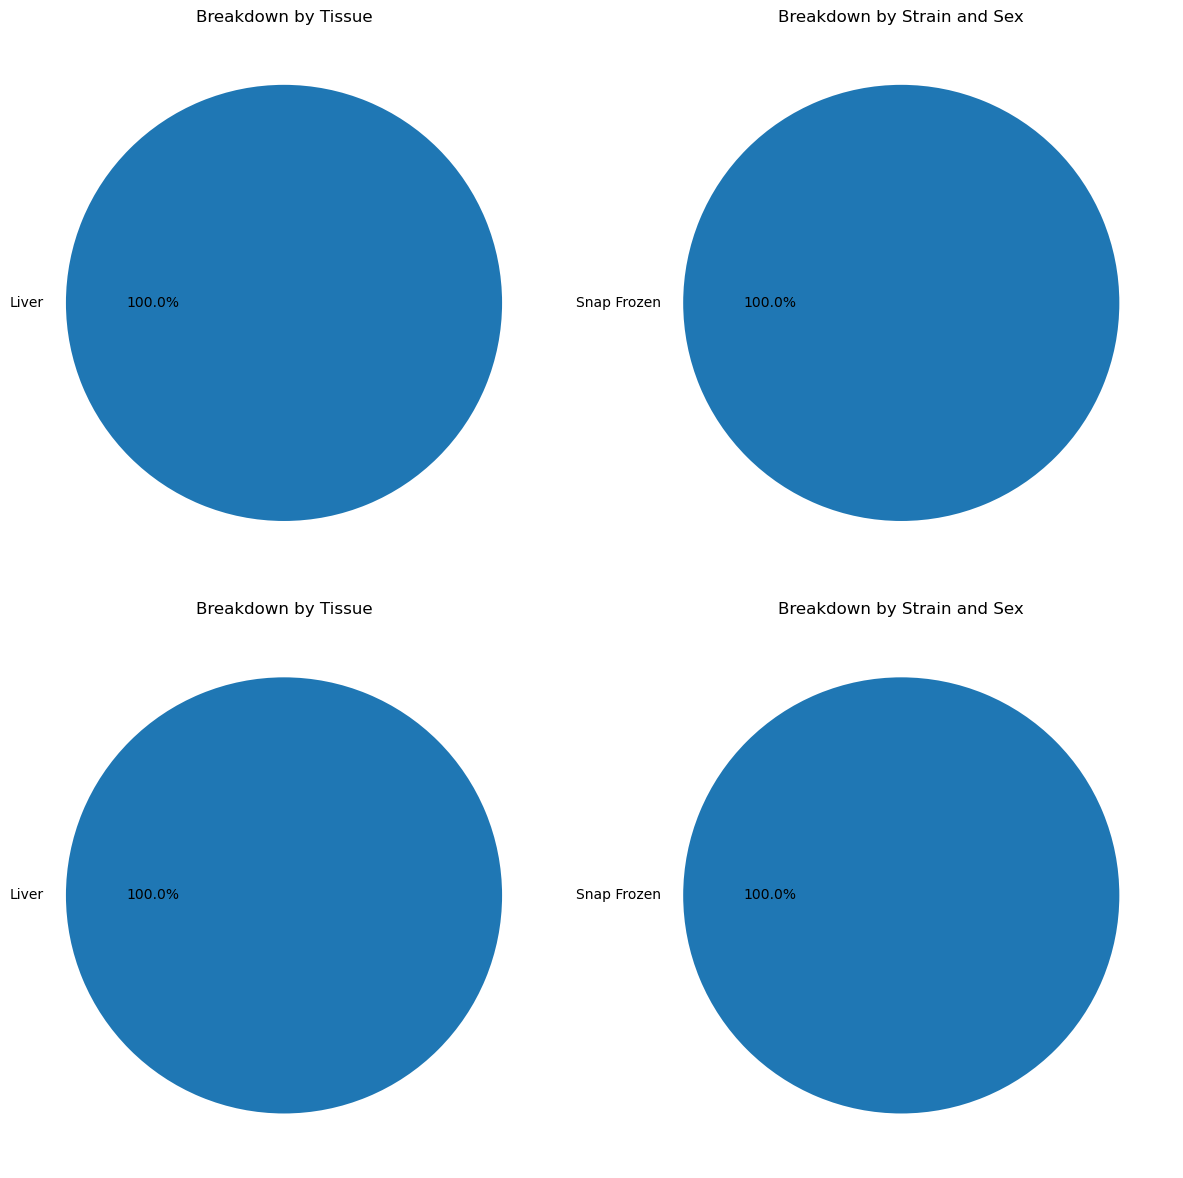

In [15]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Breakdown 1: Strain
strain_counts = sample_df['biospecimen_anatomic_site'].value_counts()
axes[0, 0].pie(strain_counts, labels=strain_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Breakdown by Tissue')

# Breakdown 2: Strain + Sex
strain_sex_counts = sample_df.groupby(['biospecimen_anatomic_site', 'preservation_method']).size().unstack()
axes[0, 1].pie(strain_sex_counts.values.flatten(), labels=strain_sex_counts.columns, autopct='%1.1f%%')
axes[0, 1].set_title('Breakdown by Strain and Sex')


# Breakdown 1: Strain
strain_counts = sample_df['biospecimen_anatomic_site'].value_counts()
axes[1, 0].pie(strain_counts, labels=strain_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Breakdown by Tissue')

# Breakdown 2: Strain + Sex
strain_sex_counts = sample_df.groupby(['biospecimen_anatomic_site', 'preservation_method']).size().unstack()
axes[1, 1].pie(strain_sex_counts.values.flatten(), labels=strain_sex_counts.columns, autopct='%1.1f%%')
axes[1, 1].set_title('Breakdown by Strain and Sex')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<h2 align="center">Mass spec data details</h2>

In [16]:
asssays_to_match = sample_df['mass_spec_assays.submitter_id'].unique()

ms_raw_data_df = process.process_node_data('ms_raw_data', ['mass_spec_assays.submitter_id'], program='MyFirstProgram', project='MyFirstProject') 
ms_raw_data_df = ms_raw_data_df[ms_raw_data_df['mass_spec_assays.submitter_id'].isin(asssays_to_match)]
ms_analysis_df = process.process_node_data('ms_analysis', ['ms_raw_datas.submitter_id'], program='MyFirstProgram', project='MyFirstProject') 
# ms_df = pd.merge(ms_raw_data_df, ms_analysis_df, left_on='submitter_id', right_on='ms_raw_datas.submitter_id')

ms_analysed_data_df = process.process_node_data('ms_analysed_data', ['submitter_id', 'ms_analyses.submitter_id'], program='MyFirstProgram', project='MyFirstProject') 
# ms_df = pd.merge(ms_df, ms_analysed_data_df, left_on='ms_analyses.submitter_id', right_on='ms_analyses.submitter_id')

dataframes = [('ms_raw_datas', ms_raw_data_df),('ms_analyses', ms_analysis_df), ('ms_analysed_datas', ms_analysed_data_df) ]
ms_df = process.merge_dataframes(process.rename_overlapping(dataframes=dataframes))
display(ms_df.head())

,ms_raw_datas.type,ms_raw_datas.project_id,ms_raw_datas.submitter_id,ms_raw_datas.consent_codes,ms_raw_datas.data_category,ms_raw_datas.data_format,ms_raw_datas.data_type,ms_raw_datas.file_name,ms_raw_datas.file_size,ms_raw_datas.file_source_repository,...,ms_analyses.submitter_id,ms_analyses.type,ms_analyses.project_id,analysis_protocols,normalization,ms_analyses.provenance,transformation,transformation_description,transformation_purpose,unit
0,ms_raw_data,MyFirstProgram-MyFirstProject,Prj171:TQSm_042122_022.mzML,NaN,targeted metabolomics,.mzML,chromatograms,TQSm_042122_022.mzML,3490163,NaN,...,Prj171:TQSm_042122_022,ms_analysis,MyFirstProgram-MyFirstProject,NaN,normalized to protein,"DataHarmonizer v1.4.10, mass_spec_assay v1.0.0",NaN,NaN,NaN,normalized peak area
1,ms_raw_data,MyFirstProgram-MyFirstProject,Prj171:TQSm_042122_034.mzML,NaN,targeted metabolomics,.mzML,chromatograms,TQSm_042122_034.mzML,3490426,NaN,...,Prj171:TQSm_042122_034,ms_analysis,MyFirstProgram-MyFirstProject,NaN,normalized to protein,"DataHarmonizer v1.4.10, mass_spec_assay v1.0.0",NaN,NaN,NaN,normalized peak area
2,ms_raw_data,MyFirstProgram-MyFirstProject,Prj171:TQSm_042122_015.mzML,NaN,targeted metabolomics,.mzML,chromatograms,TQSm_042122_015.mzML,3490190,NaN,...,Prj171:TQSm_042122_015,ms_analysis,MyFirstProgram-MyFirstProject,NaN,normalized to protein,"DataHarmonizer v1.4.10, mass_spec_assay v1.0.0",NaN,NaN,NaN,normalized peak area
3,ms_raw_data,MyFirstProgram-MyFirstProject,Prj171:TQSm_042122_016.mzML,NaN,targeted metabolomics,.mzML,chromatograms,TQSm_042122_016.mzML,3489881,NaN,...,Prj171:TQSm_042122_016,ms_analysis,MyFirstProgram-MyFirstProject,NaN,normalized to protein,"DataHarmonizer v1.4.10, mass_spec_assay v1.0.0",NaN,NaN,NaN,normalized peak area
4,ms_raw_data,MyFirstProgram-MyFirstProject,Prj171:TQSm_042122_031.mzML,NaN,targeted metabolomics,.mzML,chromatograms,TQSm_042122_031.mzML,3490107,NaN,...,Prj171:TQSm_042122_031,ms_analysis,MyFirstProgram-MyFirstProject,NaN,normalized to protein,"DataHarmonizer v1.4.10, mass_spec_assay v1.0.0",NaN,NaN,NaN,normalized peak area


<h1 align="center">Build the mwTab File</h1> 

### Top-level "keys" in __mwTabFile__

- 'METABOLOMICS WORKBENCH' 
- 'PROJECT'
- 'STUDY'
- 'SUBJECT'
- 'SUBJECT_SAMPLE_FACTORS'
- 'COLLECTION'
- 'TREATMENT'
- 'SAMPLEPREP'
- 'CHROMATOGRAPHY'
- 'ANALYSIS'
- 'MS'
- 'MS_METABOLITE_DATA'

## Provide complete and descriptive summaries of the data

In [18]:
project_summary = "The aryl hydrocarbon receptor (AhR) is a transcription factor activated by structurally diverse chemicals, endogenous metabolites, and natural products. AhR activation causes the dissociation of chaperone proteins, followed by translocation to the nucleus and dimerization with the AhR nuclear translocator (ARNT). The complex binds dioxin response elements (DREs; 5’-GCGTG-3’) eliciting changes in gene expression. AhR activation by its most potent ligand 2,3,7,8-tetrachlorodibenzo-p-dioxin (TCDD) promotes the development and progression of non-alcoholic fatty liver disease (NAFLD). NAFLD is a spectrum of pathologies that spans simple, reversible, and benign lipid accumulation (hepatic steatosis), to steatosis with inflammation (steatohepatitis) and collagen deposition (fibrosis/cirrhosis) in the absence of excessive alcohol consumption. NAFLD prevalence is projected to increase from ~83 million in 2015 to ~101 million by 2030 in the US alone, while increasing the risk for more complex disorders including Metabolic Syndrome, cardiovascular disease, diabetes, cirrhosis, end-stage liver disease and hepatocellular carcinoma (HCC). The role of AhR-mediated metabolic dysregulation in hepatotoxicity and the etiology of more complex metabolic diseases warrants further investigation. Therofore, in this project on PND28 mice were orally gavaged at the start of the light cycle (zeitgeber [ZT] 0-1) with 0.1 ml sesame oil vehicle or 0.01, 0.03, 0.1, 0.3, 1, 3, 10, and 30 μg/kg body weight TCDD every 4 days for 28 days for a total of 7 treatments. The first gavage was administered on day 0, with the last gavage administered on day 24 of the 28-day study. On day 28, tissue samples were harvested (ZT 0-3), immediately flash frozen in liquid nitrogen and stored at -80°C until analysis."

study_summary = "In this study, we tested the hypothesis that the dose-dependent disruption of propionyl-CoA metabolism produces toxic intermediates that contribute to TCDD hepatotoxicity and progression of steatosis to steatohepatitis with fibrosis. Our results suggest TCDD dose-dependently reduced cobalamin (Cbl aka vitamin B12) levels compromising methylmalonyl-CoA mutase (MUT) activity and limiting the metabolism of propionyl-CoA to succinyl-CoA using the canonical Cbl-dependent carboxylation pathway. Consequently, accumulating propionyl-CoA was redirected to the alternate Cbl-independent β–oxidation-like pathway resulting in the dose-dependent accumulation of acrylyl-CoA, as indicated by the increase in S-(2-carboxyethyl)-L-cysteine, a conjugate produced following the spontaneous reaction between the sulfhydryl group of cysteine and highly reactive acrylyl-CoA."

## Create an empty mwTabFile object
Look into another way to make an empty file or for a mechanism to ensure that we start with a completely blank object.

In [19]:
mwfiles_generator = mwtab.read_files("35")
mwfile = next(mwfiles_generator)

In [20]:
for key in mwfile.keys():
    mwfile[key] = OrderedDict()


with open("empty_mwtab.txt", "w") as outfile:

    mwfile.write(outfile, file_format="mwtab")

In [21]:
keys = ['Units', 'Data', 'Metabolites']
initial_values = [None] * len(keys)

my_ordered_dict = OrderedDict(zip(keys, initial_values))

mwfile["MS_METABOLITE_DATA"] = my_ordered_dict

mwfile["MS_METABOLITE_DATA"].keys()

odict_keys(['Units', 'Data', 'Metabolites'])

## Build METABOLOMICS WORKBENCH block

In [22]:
# For some reason the IDs don't change. Check this.
json_data = {
    "VERSION": "1",
    "CREATED_ON": str(formatted_date)
}

ordered_dict = OrderedDict(json_data)

mwfile['METABOLOMICS WORKBENCH'] = ordered_dict
display(ordered_dict)

OrderedDict([('VERSION', '1'), ('CREATED_ON', '2023-06-30')])

## Build PROJECT block

In [23]:
json_data = {
    "PROJECT_TITLE": process.get_unique_values(study_df, 'study_title'),
    "PROJECT_TYPE": process.get_unique_values(sample_df, 'data_category'), 
    "PROJECT_SUMMARY": process.get_unique_values(study_df, 'study_description'),
    "INSTITUTE": process.get_unique_values(study_df, 'contact_institution'),
    "LAST_NAME": process.get_unique_values(study_df, 'last_name'),
    "FIRST_NAME": process.get_unique_values(study_df, 'first_name'),
    "DEPARTMENT": process.get_unique_values(study_df, 'contact_department'),
    #"LABORATORY":"dbzach.fst.msu.edu",
    "ADDRESS":process.get_unique_values(study_df, 'location'),
    "EMAIL":process.get_unique_values(study_df, 'contact_email'),
    "PHONE":process.get_unique_values(study_df, 'contact_telephone'),
    "FUNDING_SOURCE": process.get_unique_values(study_df, 'support_source') + ' ' + process.get_unique_values(study_df, 'support_id')
}

mwfile['PROJECT'] = OrderedDict(json_data)
display(OrderedDict(json_data))

OrderedDict([('PROJECT_TITLE', 'Prj171_Mm_TCDD_RDDR-28D_Male'),
             ('PROJECT_TYPE', 'targeted metabolomics'),
             ('PROJECT_SUMMARY',
              'Male mice were treated with TCDD every 4 days for 28 days'),
             ('INSTITUTE', 'Michigan State University'),
             ('LAST_NAME', 'Zacharewski'),
             ('FIRST_NAME', 'Timothy'),
             ('DEPARTMENT', 'Biochemistry and Molecular Biology'),
             ('ADDRESS', '48824:East Lansing'),
             ('EMAIL', 'tzachare@msu.edu'),
             ('PHONE', '517-884-2054'),
             ('FUNDING_SOURCE',
              'NIEHS; Superfund Basic Research Program R01ES029541:P42ES004911')])

## Build STUDY block
Most datasets just use the same data as Project. Here we may be able to do better.

In [24]:
# Subset the subjects for only those that have a matching MS assay
ms_assay_df = process.process_node_data('mass_spec_assay', ['aliquots.submitter_id'], program='MyFirstProgram', project='MyFirstProject', fileformat='json', external_links=['aliquots'])
aliquot_list = ms_assay_df['aliquots.submitter_id']
subject_list = sample_df[sample_df['aliquots.submitter_id'].isin(aliquot_list)]['subjects.submitter_id']
subject_subset = subject_df[subject_df['subjects.submitter_id'].isin(subject_list)]
columns_to_include = ['subjects.submitter_id','sex','test_article_name', 'dose_amount']

# Create a new DataFrame with only the specified columns
selected_columns = columns_to_include
subset_df = subject_subset[selected_columns].drop_duplicates()
subset_df = subset_df.reset_index(drop=True)

# Count the frequency of two values in the column
value_counts = subset_df['sex'].value_counts()

# Get the frequency of specific values
female_count = value_counts.get('female', 0)
male_count = value_counts.get('male', 0)
groups = subset_df['dose_amount'].nunique()

In [25]:
json_data = { 
    "STUDY_TITLE": process.get_unique_values(study_df, 'study_title'),
    "STUDY_TYPE": process.get_unique_values(sample_df, 'data_type'),
    "STUDY_SUMMARY": process.get_unique_values(study_df, 'study_description'),
    "INSTITUTE":process.get_unique_values(study_df, 'contact_institution'),
    "DEPARTMENT":process.get_unique_values(study_df, 'contact_department'),
    "LAST_NAME": process.get_unique_values(study_df, 'last_name'),
    "FIRST_NAME": process.get_unique_values(study_df, 'first_name'),
    "ADDRESS":process.get_unique_values(study_df, 'location'),
    "EMAIL":process.get_unique_values(study_df, 'contact_email'),
    "PHONE":process.get_unique_values(study_df, 'contact_telephone'),
    "NUM_GROUPS":int(groups),
    "TOTAL_SUBJECTS":int(len(process.get_unique_values(subset_df, 'subjects.submitter_id').split(','))),
    "NUM_MALES":int(male_count),
    "NUM_FEMALES":int(female_count)
}


# original dict
ordered_dict = OrderedDict(json_data)

# key transformation
#renamed_dict = OrderedDict((key_mappings.get(key, key), value) for key, value in ordered_dict.items())

mwfile['STUDY'] = ordered_dict
display(ordered_dict)

OrderedDict([('STUDY_TITLE', 'Prj171_Mm_TCDD_RDDR-28D_Male'),
             ('STUDY_TYPE', 'chromatograms'),
             ('STUDY_SUMMARY',
              'Male mice were treated with TCDD every 4 days for 28 days'),
             ('INSTITUTE', 'Michigan State University'),
             ('DEPARTMENT', 'Biochemistry and Molecular Biology'),
             ('LAST_NAME', 'Zacharewski'),
             ('FIRST_NAME', 'Timothy'),
             ('ADDRESS', '48824:East Lansing'),
             ('EMAIL', 'tzachare@msu.edu'),
             ('PHONE', '517-884-2054'),
             ('NUM_GROUPS', 6),
             ('TOTAL_SUBJECTS', 30),
             ('NUM_MALES', 30),
             ('NUM_FEMALES', 0)])

## Build SUBJECT block
Each blocks are an `OrderedDict` class

In [26]:
# replace this with a gen3 query
json_data = {
    "SUBJECT_TYPE": "Mammal",  #*dropdown
    "SUBJECT_SPECIES": process.get_unique_values(study_df, 'organism'),
    "TAXONOMY_ID":"10090", 
    "SPECIES_GROUP": "Mammal",
    "AGE_OR_AGE_RANGE": process.get_unique_values(subject_df, 'age'),
    "GENDER": process.get_unique_values(subject_df, 'sex'),
    "ANIMAL_ANIMAL_SUPPLIER": process.get_unique_values(subject_df, 'strain_source'),
    "ANIMAL_HOUSING": 'cage_type: ' + 
                        process.get_unique_values(subject_df, 'cage_type') + 
                        '; bedding_type: ' + 
                        process.get_unique_values(subject_df, 'bedding_type'),
    "ANIMAL_LIGHT_CYCLE":process.get_unique_values(subject_df, 'vivarium_light_cycle'),
    "ANIMAL_FEED":process.get_unique_values(subject_df, 'feed_name'),
    "ANIMAL_WATER":process.get_unique_values(subject_df, 'water_type')
}

# original dict
ordered_dict = OrderedDict(json_data)

mwfile['SUBJECT'] = ordered_dict
display(ordered_dict)

OrderedDict([('SUBJECT_TYPE', 'Mammal'),
             ('SUBJECT_SPECIES', 'Mus musculus'),
             ('TAXONOMY_ID', '10090'),
             ('SPECIES_GROUP', 'Mammal'),
             ('AGE_OR_AGE_RANGE', '56'),
             ('GENDER', 'male'),
             ('ANIMAL_ANIMAL_SUPPLIER', 'Charles Rivers Laboratories'),
             ('ANIMAL_HOUSING',
              'cage_type: Innovive Innocage; bedding_type: ALPHA-dri'),
             ('ANIMAL_LIGHT_CYCLE', '12:12'),
             ('ANIMAL_FEED', 'Harlan Teklad 8940'),
             ('ANIMAL_WATER', 'Innovive')])

## Build SUBJECT_SAMPLE_FACTORS block
Each blocks are an `OrderedDict` class

In [27]:
subject_subset = subject_df[['subjects.submitter_id', 'dose_amount', 'dose_amount_unit', 'test_article_name']].drop_duplicates()

subject_subset['dose_group'] = subject_subset['dose_amount'].astype(str) + ' ' + subject_subset['dose_amount_unit'].astype(str)

sample_subset = sample_df[['subjects.submitter_id', 'ms_raw_datas.submitter_id', 'file_name']].drop_duplicates()

json_SUBJECT_SAMPLE_FACTORS = []

for index, row in sample_subset.iterrows():
    subject_sample = {}
    subject_sample.update({'Subject ID': row['subjects.submitter_id'].split(":")[-1].strip()})
    subject_sample.update({'Sample ID': row['ms_raw_datas.submitter_id'].split(":")[-1].strip().split(".")[0].strip()})
    factors = subject_subset[subject_subset['subjects.submitter_id'] == row['subjects.submitter_id']]
    factor_vals = {}
    for _, row_factors in factors.iterrows():
        for f in row_factors.index:
            if f not in ['subjects.submitter_id', 'dose_amount', 'dose_amount_unit']:
                factor_vals.update({f: row_factors[f]})
    subject_sample.update({'Factors':factor_vals})
    subject_sample.update({'Additional sample data': {"RAW_FILE_NAME": row['file_name'].replace('.raw', '.mzML')}})
    if subject_sample:
        json_SUBJECT_SAMPLE_FACTORS.append(OrderedDict(subject_sample)) 

mwfile['SUBJECT_SAMPLE_FACTORS'] = json_SUBJECT_SAMPLE_FACTORS
display(json_SUBJECT_SAMPLE_FACTORS[:2])

[OrderedDict([('Subject ID', 'M83'),
              ('Sample ID', 'TQSm_042122_016'),
              ('Factors',
               {'test_article_name': 'TCDD',
                'dose_group': '0.3 microgram per kilogram'}),
              ('Additional sample data',
               {'RAW_FILE_NAME': 'TQSm_042122_016.mzML'})]),
 OrderedDict([('Subject ID', 'M113'),
              ('Sample ID', 'TQSm_042122_028'),
              ('Factors',
               {'test_article_name': 'TCDD',
                'dose_group': '3.0 microgram per kilogram'}),
              ('Additional sample data',
               {'RAW_FILE_NAME': 'TQSm_042122_028.mzML'})])]

## Build COLLECTION block
Each blocks are an `OrderedDict` class

In [28]:
json_data = {
    #COLLECTION_SUMMARY": get_unique_values(sample_df, 'method_of_sample_procurement'),
    "COLLECTION_SUMMARY": 'Samples were collected by necropsy and flash frozen in liquid nitrogren',
    #"COLLECTION_PROTOCOL_ID": ,
    #"COLLECTION_PROTOCOL_FILENAME": ,
    #"COLLECTION_PROTOCOL_COMMENTS": ,
    "SAMPLE_TYPE": process.get_unique_values(sample_df, 'biospecimen_anatomic_site'), 
    #"COLLECTION_METHOD": ,
    #"COLLECTION_LOCATION": ,
    #"COLLECTION_DURATION": ,
    #"COLLECTION_FREQUENCY": ,
    "STORAGE_CONDITIONS":process.get_unique_values(sample_df, 'preservation_method'),
    #"STORAGE_VIALS": "Tube type",
    #"COLLECTION_TUBE_TEMP":"Tube storage",
}

# original dict
ordered_dict = OrderedDict(json_data)

mwfile['COLLECTION'] = ordered_dict
display(ordered_dict)

OrderedDict([('COLLECTION_SUMMARY',
              'Samples were collected by necropsy and flash frozen in liquid nitrogren'),
             ('SAMPLE_TYPE', 'Liver'),
             ('STORAGE_CONDITIONS', 'Snap Frozen')])

## Build TREATMENT block
Each blocks are an `OrderedDict` class

In [29]:
# replace this with a gen3 query
json_data = {
    #"TREATMENT_SUMMARY": get_unique_values(subject_df, 'treatment_protocol'),
    "TREATMENT_SUMMARY": "Mice were orally gavaged with 0.1 mL of the test article in vehicle to achieve the expected dosage every 4 days for 28 days for a total of 7 administrations.",
    #"TREATMENT_PROTOCOL_ID":,
    #"TREATMENT_PROTOCOL_FILENAME":,
    #"TREATMENT_PROTOCOL_COMMENTS":,
    #"TREATMENT":,
    "TREATMENT_COMPOUND": process.get_unique_values(subject_df, 'test_article_dtxsid') + ': ' + process.get_unique_values(subject_df, 'test_article_name'),
    "TREATMENT_ROUTE":process.get_unique_values(subject_df, 'route'),
    "TREATMENT_DOSE":str(sorted(process.get_unique_values(subject_df, 'dose_amount').split(','))),
    "TREATMENT_DOSEVOLUME": process.get_unique_values(subject_df, 'administration_volume_ml') + ' ' + 'mL',
    "TREATMENT_VEHICLE":process.get_unique_values(subject_df, 'vehicle_dtxsid') + ': ' + process.get_unique_values(subject_df, 'vehicle_name'),
    #"ANIMAL_VET_TREATMENTS":,
    #"ANIMAL_ANESTHESIA":,
    #"ANIMAL_ACCLIMATION_DURATION":,
    "ANIMAL_FASTING":process.get_unique_values(subject_df, 'feed_paradigm'),
    "ANIMAL_ENDP_EUTHANASIA":process.get_unique_values(subject_df, 'euthanasia_method'),
    "ANIMAL_ENDP_TISSUE_COLL_LIST":process.get_unique_values(sample_df, 'biospecimen_anatomic_site')
    #"ANIMAL_ENDP_TISSUE_PROC_METHOD":get_unique_values(sample_df, 'method_of_sample_procurement')
}

# original dict
ordered_dict = OrderedDict(json_data)

mwfile['TREATMENT'] = ordered_dict
display(ordered_dict)

OrderedDict([('TREATMENT_SUMMARY',
              'Mice were orally gavaged with 0.1 mL of the test article in vehicle to achieve the expected dosage every 4 days for 28 days for a total of 7 administrations.'),
             ('TREATMENT_COMPOUND', 'DTXSID4051378: TCDD'),
             ('TREATMENT_ROUTE', 'Oral Gavage Route of Administration'),
             ('TREATMENT_DOSE',
              "['0.0', '0.03', '0.1', '0.3', '1.0', '10.0', '3.0', '30.0']"),
             ('TREATMENT_DOSEVOLUME', '0.1 mL'),
             ('TREATMENT_VEHICLE', 'DTXSID9033971: Sesame Oil'),
             ('ANIMAL_FASTING', 'ad libitum'),
             ('ANIMAL_ENDP_EUTHANASIA', 'Carbon dioxide asphyxiation'),
             ('ANIMAL_ENDP_TISSUE_COLL_LIST', 'Liver')])

## Build SAMPLEPREP block
Each blocks are an `OrderedDict` class

In [30]:
# replace this with a gen3 query

tmp_string = ("Flash frozen liver samples (about 25 mg) were extracted using HPLC-grade methanol and water (5:3 ratio)"
    "containing 13C-,15N-labeled amino acid (Sigma; 767964) internal standards. HPLC-grade chloroform (methanol:water:chloroform "    
    "ratio 5:3:5) was added, vortexed, shaken for 15 min at 4 Celsius, and centrifuged at maximum speed (3000 x g) to achieve "
    "phase separation. The methanol:water phase containing the polar metabolites was transferred, dried under nitrogen gas at "
    "room temperature. Untargeted extractions were reconstituted with 400 ul of 10 mM tributylamine and 15 mM acetic acid in "
    "97:3 water:methanol for analysis.")

json_data = {
    #"SAMPLEPREP_SUMMARY": get_unique_values(sample_df, 'analyte_protocol'),
    "SAMPLEPREP_SUMMARY": tmp_string,
    "PROCESSING_STORAGE_CONDITIONS": process.get_unique_values(sample_df, 'extract_preservation_method'),
    #"SAMPLEPREP_PROTOCOL_ID":"protid",
    #"SAMPLEPREP_PROTOCOL_FILENAME":"protfile",
    #"SAMPLEPREP_PROTOCOL_COMMENTS":"procomm",
    #"PROCESSING_METHOD":"procmethod",
    #"PROCESSING_STORAGE_CONDITIONS":"80",
    #"EXTRACTION_METHOD":"extmethod",
    #"EXTRACT_CONCENTRATION_DILUTION":"dilution",
    #"EXTRACT_ENRICHMENT":"enrch",
    #"EXTRACT_CLEANUP":"clean",
    #"EXTRACT_STORAGE":"-80",
    #"SAMPLE_RESUSPENSION":"resyus",
    "SAMPLE_DERIVATIZATION":process.get_unique_values(sample_df, 'derivitization'),
    "SAMPLE_SPIKING":process.get_unique_values(sample_df, 'calibration_standard')
    #"SUBCELLULAR_LOCATION":"subcell loc",
}

json_data = {k: v for k, v in json_data.items() if v != 'nan'}

# original dict
ordered_dict = OrderedDict(json_data)

mwfile['SAMPLEPREP'] = ordered_dict
display(ordered_dict)

OrderedDict([('SAMPLEPREP_SUMMARY',
              'Flash frozen liver samples (about 25 mg) were extracted using HPLC-grade methanol and water (5:3 ratio)containing 13C-,15N-labeled amino acid (Sigma; 767964) internal standards. HPLC-grade chloroform (methanol:water:chloroform ratio 5:3:5) was added, vortexed, shaken for 15 min at 4 Celsius, and centrifuged at maximum speed (3000 x g) to achieve phase separation. The methanol:water phase containing the polar metabolites was transferred, dried under nitrogen gas at room temperature. Untargeted extractions were reconstituted with 400 ul of 10 mM tributylamine and 15 mM acetic acid in 97:3 water:methanol for analysis.'),
             ('PROCESSING_STORAGE_CONDITIONS', '-80C'),
             ('SAMPLE_SPIKING', '13C,15N-methionine')])

## Build CHROMATOGRAPHY block
Each blocks are an `OrderedDict` class

In [31]:
# replace this with a gen3 query
json_data = {
    "CHROMATOGRAPHY_SUMMARY": process.get_unique_values(ms_assay_df, 'chromatography_protocol'),
    "CHROMATOGRAPHY_TYPE": process.get_unique_values(ms_assay_df, 'chromatography_type'),
    "INSTRUMENT_NAME": process.get_unique_values(ms_assay_df, 'chromatography_instrument'),
    "COLUMN_NAME": process.get_unique_values(ms_assay_df, 'chromatography_column'),
    "SOLVENT_A": process.get_unique_values(ms_assay_df, 'solventA'),
    "SOLVENT_B": process.get_unique_values(ms_assay_df, 'solventB'),
    "SOLVENT_C": process.get_unique_values(ms_assay_df, 'solventC'),
    "FLOW_GRADIENT": process.get_unique_values(ms_assay_df, 'elution_program'),
    "FLOW_RATE":process.get_unique_values(ms_assay_df, 'flow_rate'),
    #"COLUMN_TEMPERATURE":"376",
    "METHODS_FILENAME":process.get_unique_values(ms_assay_df, 'chromatography_method_filename')
    #"METHODS_ID":"id",
    #"COLUMN_PRESSURE":"colpress",
    #"INJECTION_TEMPERATURE":"injtemp"
}
json_data = {key: value for key, value in json_data.items() if value != 'nan'}
# original dict
ordered_dict = OrderedDict(json_data)

mwfile['CHROMATOGRAPHY'] = ordered_dict
display(ordered_dict)

OrderedDict([('CHROMATOGRAPHY_SUMMARY',
              'The mobile phases were 10mM PFHA in water (mobile phase A) and acetonitrile (mobile phase B) using the following gradient: 0 min - 100% A, 1.0 min - 100% A, 6.0 min - 35% A, 6.01 min - 10% A, 7.0 min - 10% A, 7.01 min - 100% A, 9.0 min - 100% A'),
             ('CHROMATOGRAPHY_TYPE', 'Reversed phase'),
             ('INSTRUMENT_NAME', 'Waters TQS'),
             ('COLUMN_NAME', 'Waters ACQUITY UPLC HSS T3 (100 x 2.1mm,1.8um)'),
             ('SOLVENT_A', '100% water; ; 10mM perfluoroheptanoic acid'),
             ('SOLVENT_B', '100% acetonitrile; ;'),
             ('FLOW_GRADIENT',
              '0 min - 100% A, 1.0 min - 100% A, 6.0 min - 35% A, 6.01 min - 10% A, 7.0 min - 10% A, 7.01 min - 100% A, 9.0 min - 100% A'),
             ('FLOW_RATE', '0.3 ml/minute')])

## Build ANALYSIS block
Each blocks are an `OrderedDict` class

In [32]:
# replace this with a gen3 query
json_data = {
    "ANALYSIS_TYPE": "MS"
}

# original dict
ordered_dict = OrderedDict(json_data)

mwfile['ANALYSIS'] = ordered_dict
display(ordered_dict)

OrderedDict([('ANALYSIS_TYPE', 'MS')])

## Build MS block
Each blocks are an `OrderedDict` class

In [33]:
# replace this with a gen3 query
json_data = {
    "INSTRUMENT_NAME": "Waters Xevo-TQ-S", 
    "INSTRUMENT_TYPE": "Triple quadrupole",
    "MS_TYPE": process.get_unique_values(ms_assay_df, 'ms_type'),
    "ION_MODE": process.get_unique_values(ms_assay_df, 'ion_mode'),
    "MS_COMMENTS": "protocol"
}

# original dict
ordered_dict = OrderedDict(json_data)

mwfile['MS'] = ordered_dict
display(ordered_dict)

OrderedDict([('INSTRUMENT_NAME', 'Waters Xevo-TQ-S'),
             ('INSTRUMENT_TYPE', 'Triple quadrupole'),
             ('MS_TYPE', 'ESI'),
             ('ION_MODE', 'POSITIVE'),
             ('MS_COMMENTS', 'protocol')])

## Build MS_METABOLITE_DATA block

#### The following block use hard-coded file paths until ToxDataCommons implements S3 buckets.

In [34]:
mwfile["MS_METABOLITE_DATA"]["Units"] = 'normalized peak area'

In [36]:
file_path = '/Volumes/Zacharewski/ToxDataCommons/PRJ171/DataFiles/CEC_normalized_peak_area.txt'

# Read the tab-delimited file
with open(file_path, 'r', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    # Extract the keys from the first row
    keys = next(reader)

    # Create a list of OrderedDict objects
    metabolite_data = [
        OrderedDict(zip(keys, row)) for row in reader
    ]

mwfile['MS_METABOLITE_DATA']['Data'] = metabolite_data
# Print the first four key-value pairs
for key, value in list(metabolite_data[0].items())[:4]:
    print(f"{key}: {value}")

: S-(2-carboxyethyl)-L-cysteine
TQSm_042122_010: 0.000868122
TQSm_042122_011: 0.000620638
TQSm_042122_012: 0.000915673


In [37]:
ms_analysed_data_id = ["Prj171:CEC_normalized_peak_area.txt"]
exclude_list = [process.get_unique_values(ms_assay_df, 'calibration_standard')]

# METABOLITE_ID NODE
metabolite_df = process.process_node_data('metabolite_id', ['ms_analysed_datas.submitter_id'], program='MyFirstProgram', project='MyFirstProject')
metabolite_df = metabolite_df[(metabolite_df['ms_analysed_datas.submitter_id'].isin(ms_analysed_data_id)) &
                            (~metabolite_df['metabolite_name'].isin(exclude_list))]



In [38]:
json_data = []

for _, row in metabolite_df.iterrows():
    js = {
        "Metabolite": row['metabolite_name'],
        "DTXSID": row['dtxsid'],
        "InChI": 'InChI=' + row['inchikey'],
        "Average Mass": str(row['mass']),
        "elution_time": str(row['elution_time'])
    }
    json_data.append(OrderedDict(js))

mwfile["MS_METABOLITE_DATA"]["Metabolites"] = json_data
display(json_data)

[OrderedDict([('Metabolite', 'S-(2-carboxyethyl)-L-cysteine'),
              ('DTXSID', 'DTXSID40193329'),
              ('InChI',
               'InChI=1S/C6H11NO4S/c7-4(6(10)11)3-12-2-1-5(8)9/h4H,1-3,7H2,(H,8,9)(H,10,11)/t4-/m0/s1'),
              ('Average Mass', '193.22'),
              ('elution_time', '2.6')])]

## Export the file

In [39]:
from mwtab.converter import Converter

with open("temp_mwtab.json", "w") as outfile:
    mwfile.write(outfile, file_format="json")

converter = Converter(from_path="temp_mwtab.json", to_path="temp_mwtab.txt",
                      from_format="json", to_format="mwtab")
converter.convert()

# Validate & upload your mwTab file

## Validation

mwTab files can be validated using the python mwTab command line (doesn't work??) or the [online validator](https://www.metabolomicsworkbench.org/data/mwtab_validate_form.php)

In [40]:
! mwtab validate temp_mwtab.txt --verbose

Processed file: /Users/apple/toxdatacommons/example_notebooks/temp_mwtab.txt
Validation Log
2023-06-30 10:11:31.746922
mwtab Python Library Version: 1.2.5
Source:        temp_mwtab.txt
Study ID:      None
Analysis ID:   None
File format:   txt
Status: Contains Validation Errors
Number Errors: 1

Error Log:
METABOLITES: Data entry #1 contains field name "InChI" which matches a commonly used field name "inchi_key".


# Upload to the metabolomic workbench ftp server

- Compress your folder containing mwTab and associated files (.zip or .7z)
- Log into [metabolomic workbench](metabolomicsworkbench.org)
- Find the NMDR FTP information. It will have the following:
    __Server name__:
    __User name__:
    __Password__:
- Connect to the FTP server using a tool such as _FileZilla_ or _WinSCP_ and upload the data